# Predicting Insrurance Costs

In [55]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Import scikit-learn libraries
from sklearn import datasets  # For dataset loading
from sklearn.model_selection import train_test_split  # For data splitting
from sklearn.preprocessing import StandardScaler  # For data preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression  # For a classification model
from sklearn.metrics import accuracy_score, confusion_matrix  # For model evaluation
from sklearn.model_selection import train_test_split

In [56]:
insure = pd.read_csv("C:\\Users\\obay\\Downloads\\archive (4)\\insurance.csv")
print(insure.head())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [57]:
column_rename_mapping = {
    'children' : 'Children in Household',
    'smoker' : 'Smoker (Yes/No)',
    'charges' : 'Insurance Costs'
}

insure = insure.rename(columns=column_rename_mapping)

print(insure.head())

   age     sex     bmi  Children in Household Smoker (Yes/No)     region  \
0   19  female  27.900                      0             yes  southwest   
1   18    male  33.770                      1              no  southeast   
2   28    male  33.000                      3              no  southeast   
3   33    male  22.705                      0              no  northwest   
4   32    male  28.880                      0              no  northwest   

   Insurance Costs  
0      16884.92400  
1       1725.55230  
2       4449.46200  
3      21984.47061  
4       3866.85520  


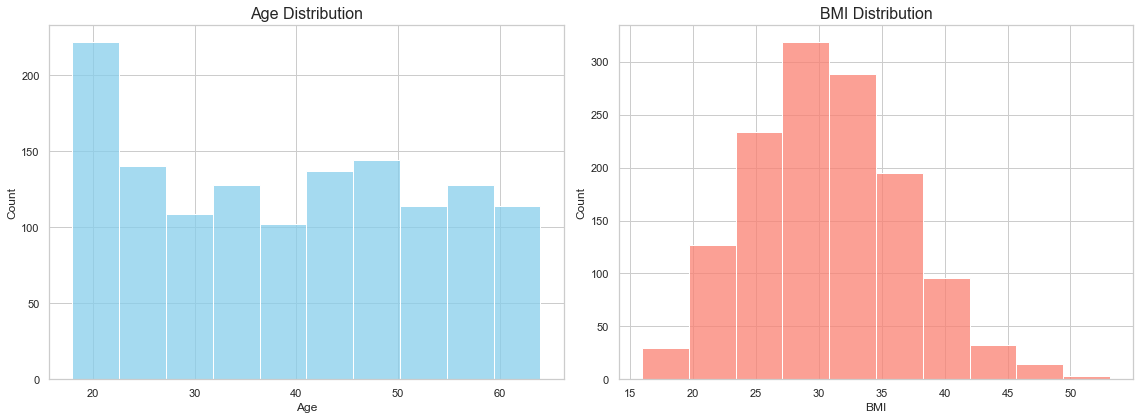

In [58]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(data=insure, x="age", bins=10, kde=False, color='skyblue', ax=axes[0])
axes[0].set_title("Age Distribution", fontsize=16)
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Count")

# 2. BMI Distribution
sns.histplot(data=insure, x="bmi", bins=10,kde=False, color='salmon', ax=axes[1])
axes[1].set_title("BMI Distribution", fontsize=16)
axes[1].set_xlabel("BMI")
axes[1].set_ylabel("Count")

# Ensure proper spacing between subplots
plt.tight_layout()

# Display the subplots
plt.show()


<AxesSubplot:ylabel='Density'>

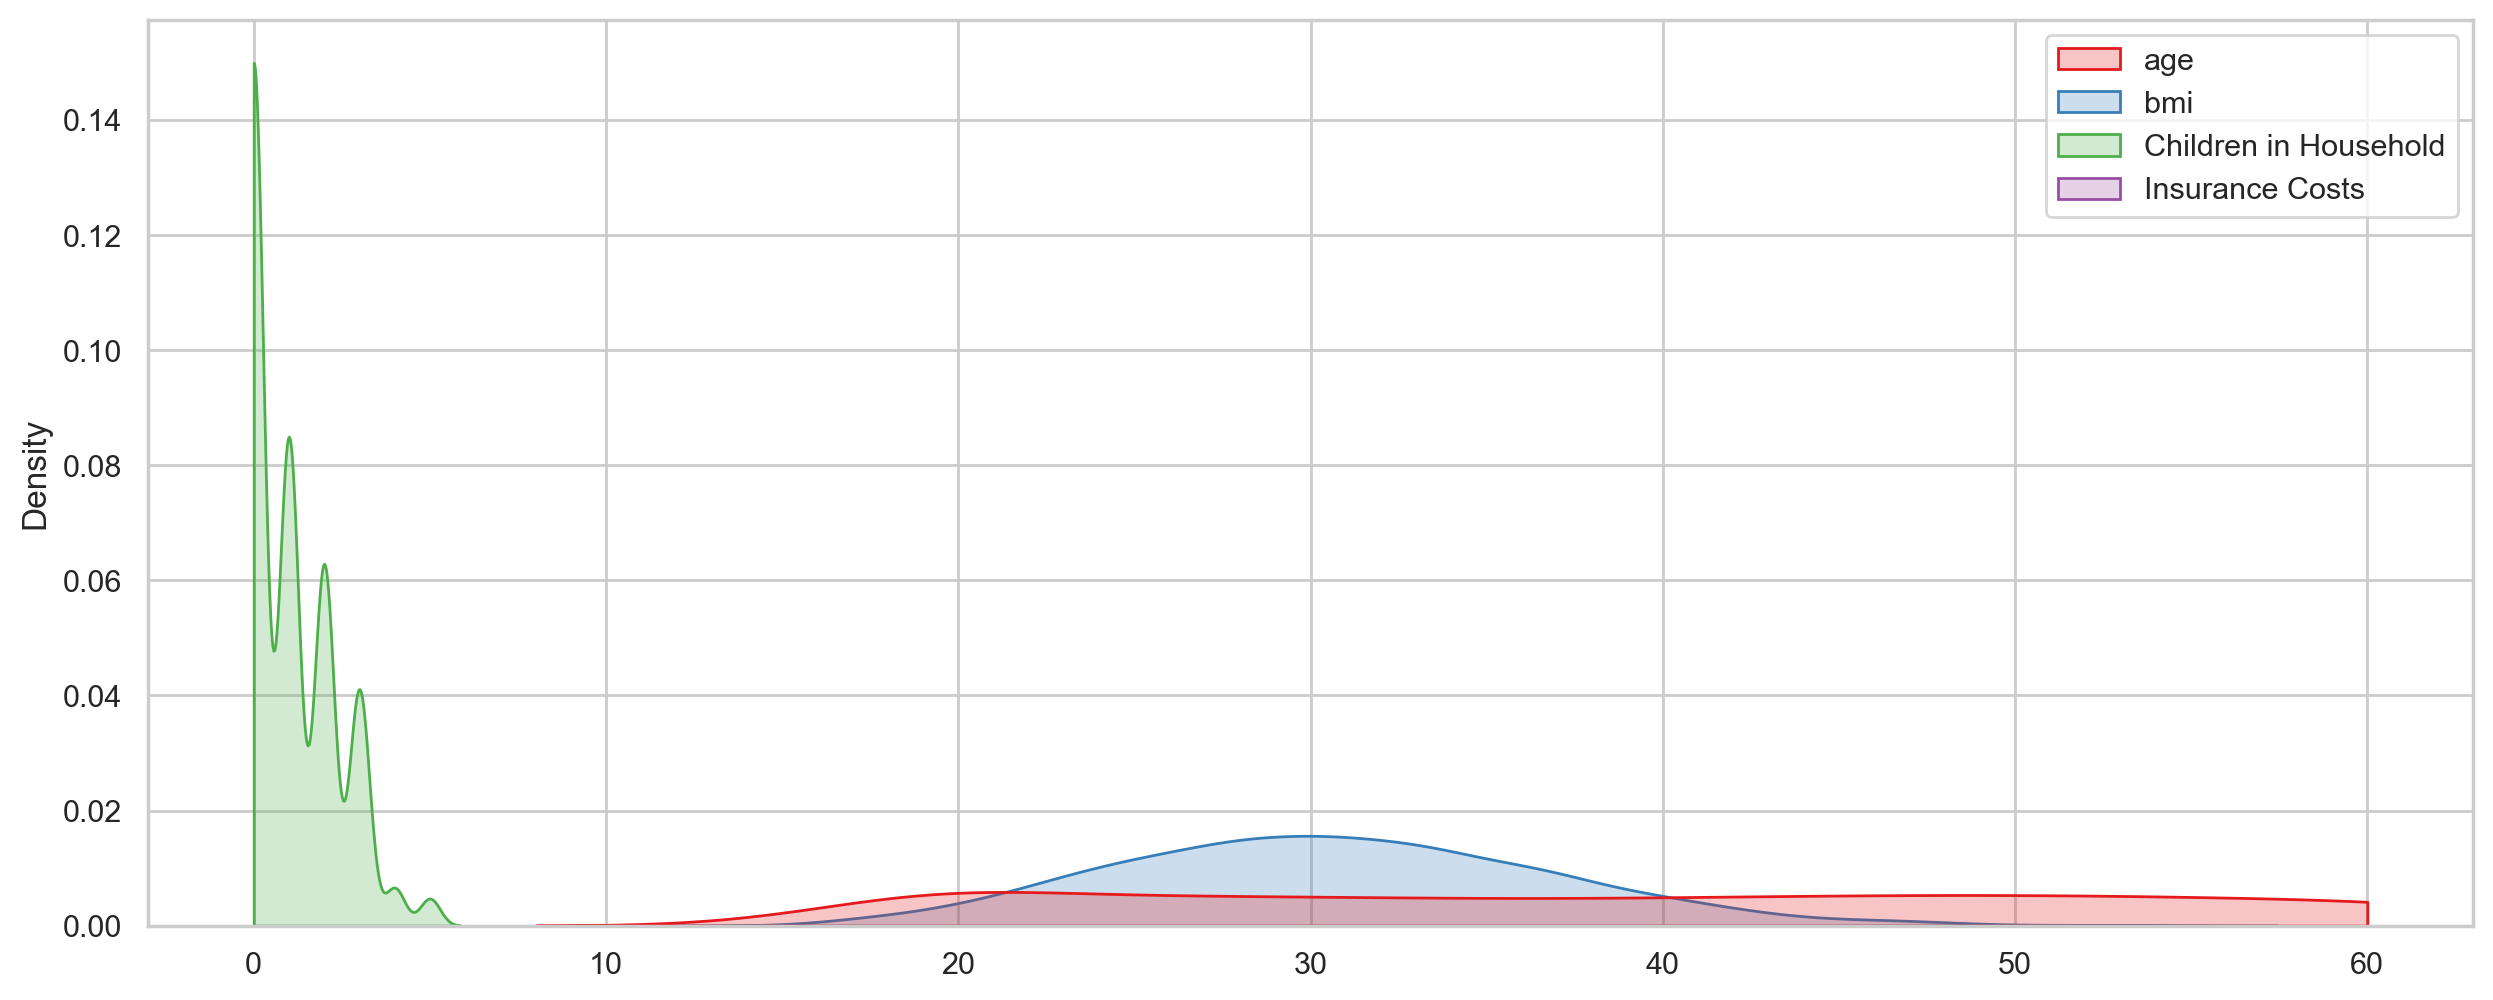

In [59]:
num_dist=['age','bmi','Children in Household','Insurance Costs']

fig, ax = plt.subplots(figsize=(15,6), dpi=200)
sns.kdeplot(data=insure, clip=[0,60], shade=True,palette='Set1')

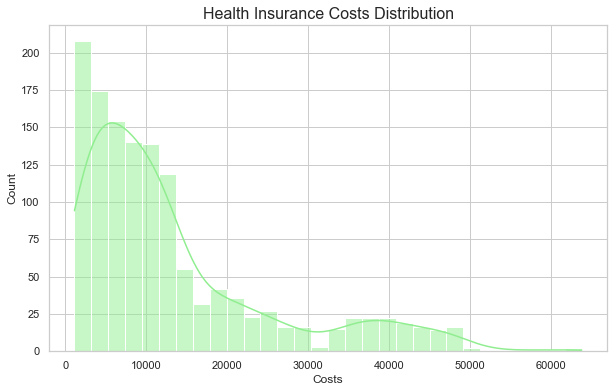

In [60]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data=insure, x="Insurance Costs", bins=30, kde=True, color='lightgreen')
plt.title("Health Insurance Costs Distribution", fontsize=16)
plt.xlabel("Costs")
plt.ylabel("Count")
plt.show()

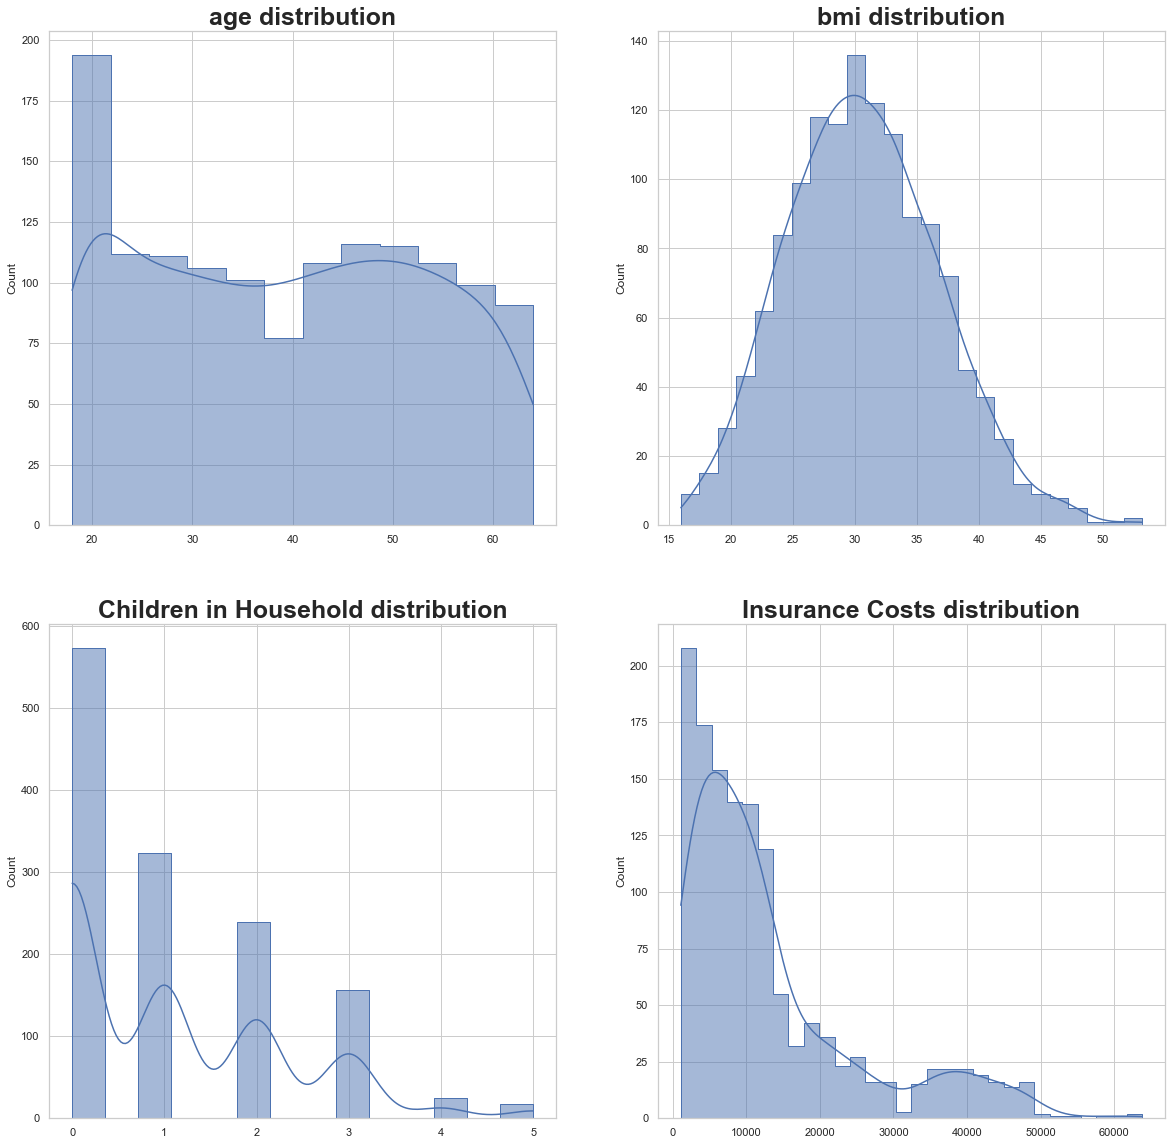

In [61]:
plt.figure(figsize=(20,20))

num_dist=['age','bmi','Children in Household','Insurance Costs']

for i, num in enumerate(num_dist):
    plt.subplot(2,2,i+1)
    sns.histplot(data=insure, x=num, kde=True, element='step', fill=True)
    plt.title(f'{num} distribution', weight='bold', fontsize=25)
    plt.xlabel('')
plt.show()    

In [62]:
cat_dist=['sex','Smoker (Yes/No)','region']
c

for i, cat in enumerate(cat_dist):
    plt.subplot(2,2,i+1)
    insure[cat].value_counts(normalize=True).plot.pie(autopct='%1.1f%%', labeldistance=None,textprops={'fontsize': 25})
    plt.title(f'{cat} percentages', weight='bold', fontsize=25)                                                    
    plt.ylabel('')  
    plt.legend(fontsize=15, borderpad=1.5)
plt.show()    

NameError: name 'c' is not defined

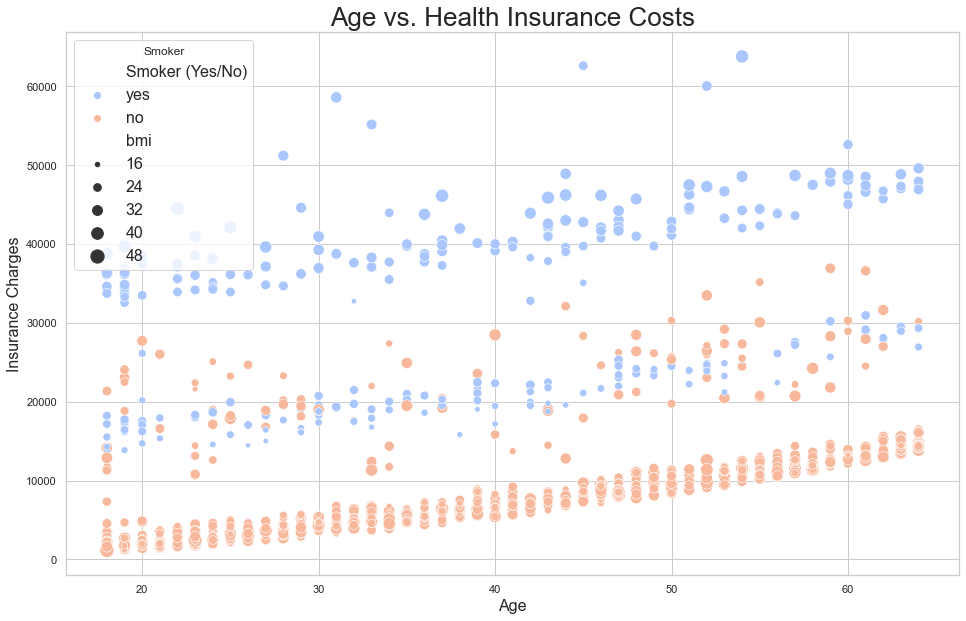

In [ ]:
fig.patch.set_facecolor('lightgray')  # Change 'lightgray' to your preferred background color
sns.set(style="whitegrid")

plt.figure(figsize=(16, 10))
sns.scatterplot(data=insure, x="age", y="Insurance Costs", hue="Smoker (Yes/No)", palette="coolwarm", size="bmi", sizes=(20, 200))
plt.title("Age vs. Health Insurance Costs", fontsize=26)
plt.xlabel("Age", fontsize=16)
plt.ylabel("Insurance Charges", fontsize=16)
plt.legend(title="Smoker", fontsize=16)
plt.show()


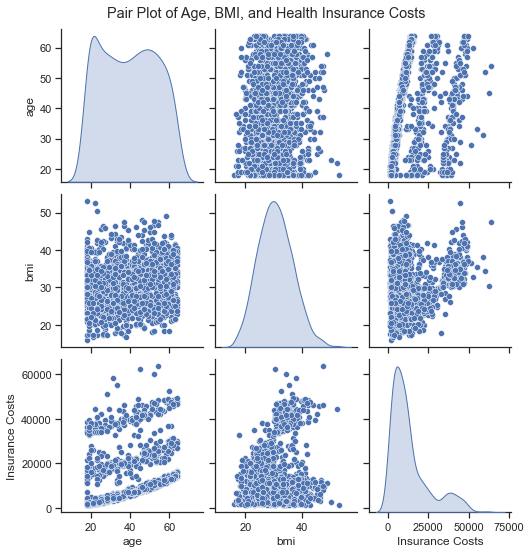

In [ ]:
sns.set(style="ticks")
sns.pairplot(insure[['age', 'bmi', 'Insurance Costs']], diag_kind="kde", palette="husl")
plt.suptitle("Pair Plot of Age, BMI, and Health Insurance Costs", y=1.02)
plt.show()

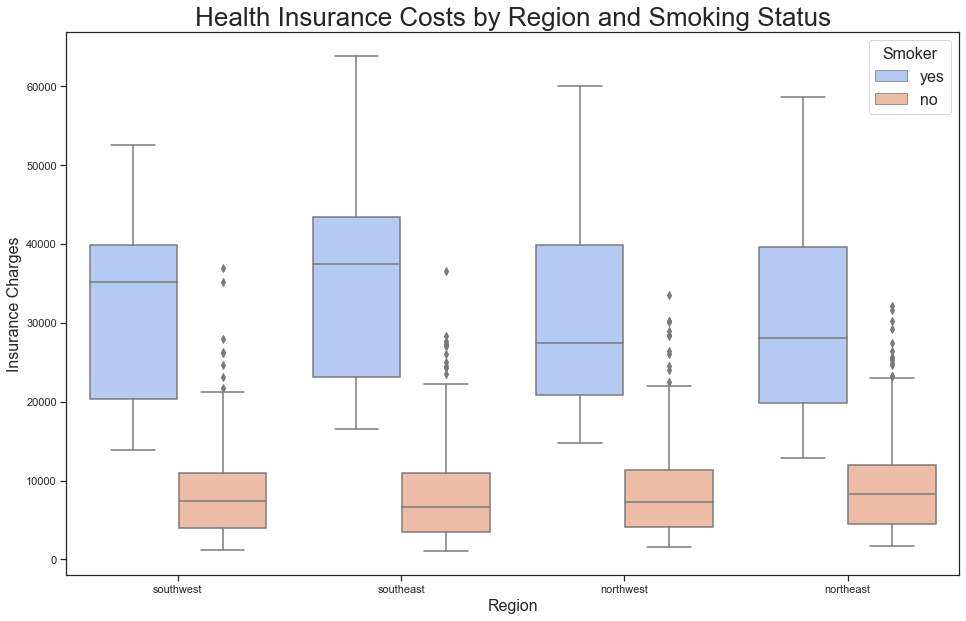

In [ ]:
plt.figure(figsize=(16, 10))
sns.boxplot(data=insure, x="region", y="Insurance Costs", hue="Smoker (Yes/No)", palette="coolwarm")
plt.title("Health Insurance Costs by Region and Smoking Status", fontsize=26)
plt.xlabel("Region", fontsize=16)
plt.ylabel("Insurance Charges", fontsize=16)
plt.legend(title="Smoker", fontsize=16, title_fontsize=16)
plt.show()

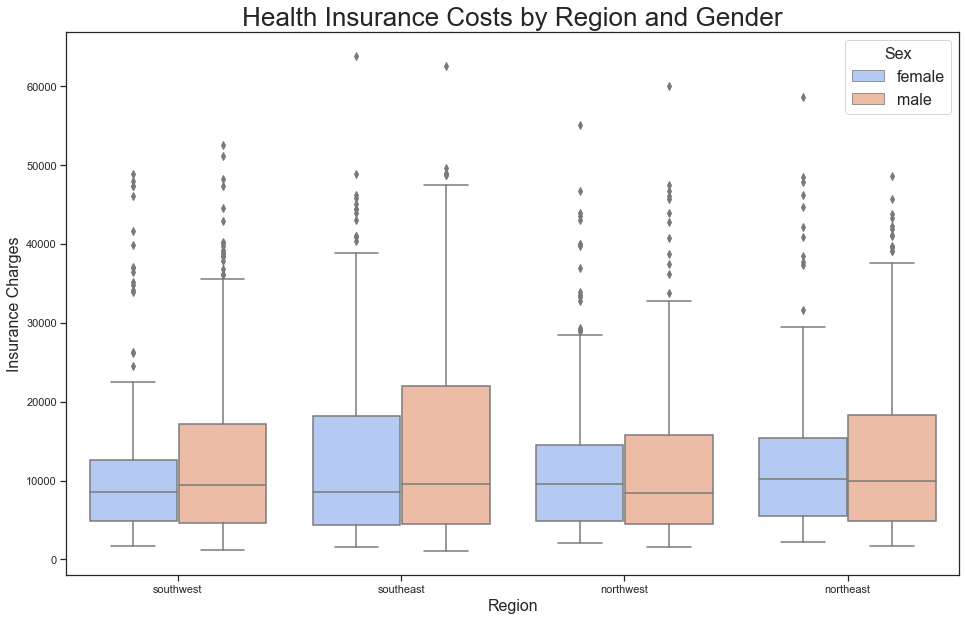

In [ ]:
plt.figure(figsize=(16, 10))
sns.boxplot(data=insure, x="region", y="Insurance Costs", hue="sex", palette="coolwarm")
plt.title("Health Insurance Costs by Region and Gender", fontsize=26)
plt.xlabel("Region", fontsize=16)
plt.ylabel("Insurance Charges", fontsize=16)
plt.legend(title="Sex", fontsize=16, title_fontsize=16)
plt.show()

## Machine Learning

In [63]:
insurance=insure.copy()
insurance=insure.drop(columns='region')
# change sex column to numerical (1=Male, 0=Female)
insurance['sex']=insurance['sex'].apply(lambda x: 1 if x=='male' else 0)
# change smoker to numerical (1=yes, 0=no)
insurance['Smoker (Yes/No)']=insurance['Smoker (Yes/No)'].apply(lambda x: 1 if x=='yes' else 0)

insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    1338 non-null   int64  
 1   sex                    1338 non-null   int64  
 2   bmi                    1338 non-null   float64
 3   Children in Household  1338 non-null   int64  
 4   Smoker (Yes/No)        1338 non-null   int64  
 5   Insurance Costs        1338 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 62.8 KB


In [64]:
X = insurance.drop('Insurance Costs', axis=1)

y = insurance['Insurance Costs']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) 

In [66]:
print(str(len(insurance)) + " Entries in the Original Dataset")
print('\n')
print('\n')
print(str(len(X_train)) + " Entries in the Training set")
print('\n')
print('\n')
print(str(len(X_test)) + " Entries in the Test set")


1338 Entries in the Original Dataset




936 Entries in the Training set




402 Entries in the Test set


In [67]:
model = LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
test_predictions = model.predict(X_test)

In [ ]:
X_test.head()

,age,sex,bmi,Children in Household,Smoker (Yes/No)
44,38,1,37.050,1,0
134,20,0,28.785,0,0
980,54,1,25.460,1,0
618,19,0,33.110,0,1
1238,37,1,22.705,3,0


In [ ]:
y_test.head()

44       6079.67150
134      2457.21115
980     25517.11363
618     34439.85590
1238     6985.50695
Name: Insurance Costs, dtype: float64

In [ ]:
mean_absolute_error(y_test, test_predictions)

4010.32188393986

In [ ]:
print(mean_squared_error(y_test,test_predictions))
print('\n')
print('\n')
print(np.sqrt(mean_squared_error(y_test,test_predictions)))  # RMSE

33693652.01080254




5804.623330656567


In [ ]:
test_residuals = y_test - test_predictions

test_residuals

44      -4285.201294
134       -71.543557
980     15397.096264
618      7168.496010
1238      966.996235
            ...     
375     -8500.739021
686      -218.218609
103     -6837.699744
1137     1523.519948
714      1157.112835
Name: Insurance Costs, Length: 402, dtype: float64

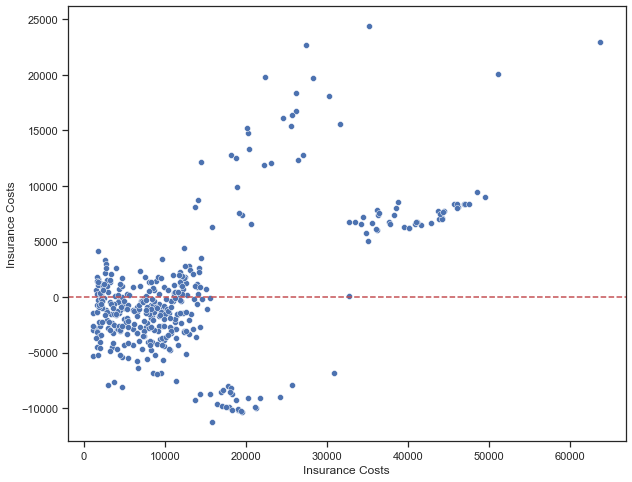

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0,color='r',ls='--')

<Figure size 720x576 with 0 Axes>

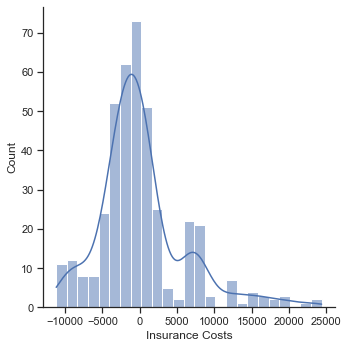

In [ ]:
plt.figure(figsize=(10,8))
sns.displot(test_residuals,bins=25,kde=True)

In [ ]:
import scipy as sp

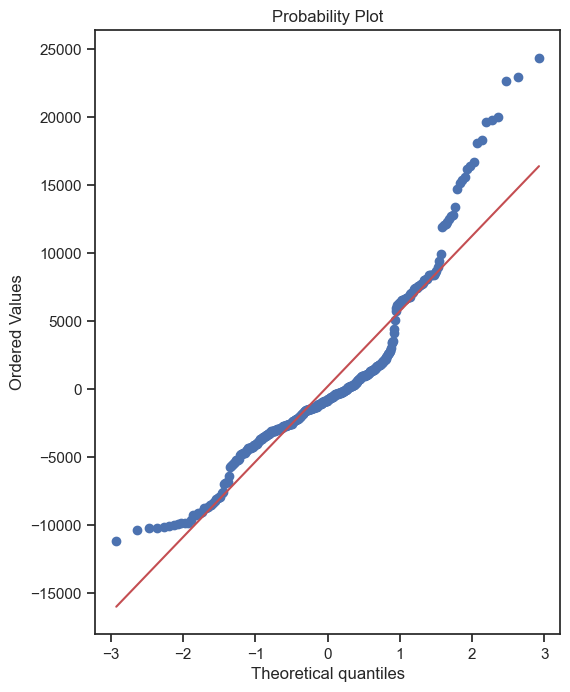

In [ ]:
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to
_ = sp.stats.probplot(test_residuals,plot=ax)


In [ ]:
final_model = LinearRegression()

In [ ]:
final_model.fit(X,y)

LinearRegression()

In [ ]:
print(final_model.coef_)
print("\n")
print("\n")
print(X.head())

[  257.73498767  -128.63985357   322.36421449   474.41112061
 23823.39253065]




   age  sex     bmi  Children in Household  Smoker (Yes/No)
0   19    0  27.900                      0                1
1   18    1  33.770                      1                0
2   28    1  33.000                      3                0
3   33    1  22.705                      0                0
4   32    1  28.880                      0                0


In [ ]:
y_hat = final_model.predict(X)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


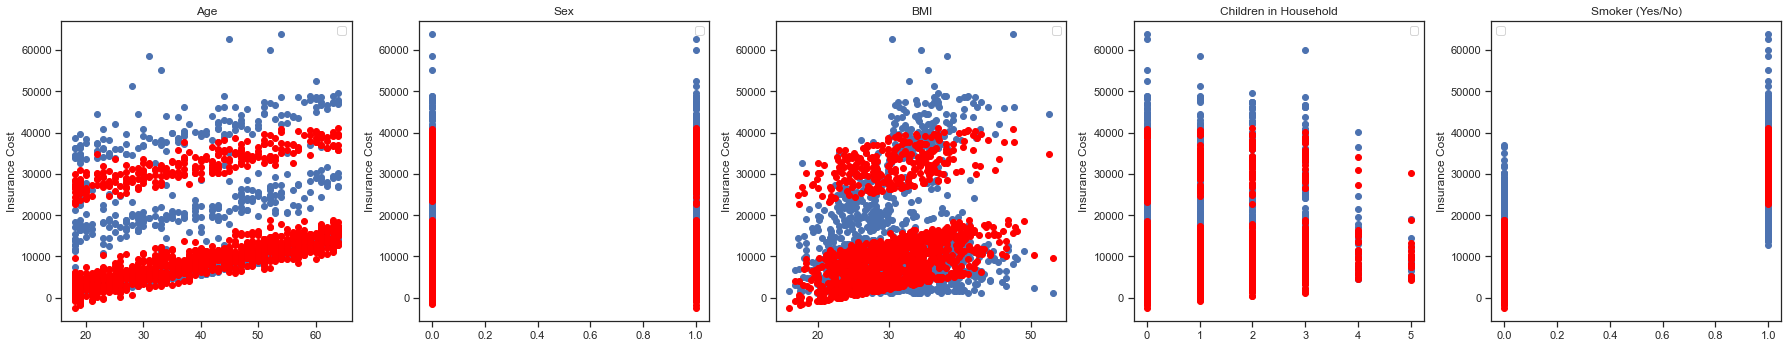

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=5,figsize=(25,5))

axes[0].plot(insurance['age'],insurance['Insurance Costs'], 'o')
axes[0].plot(insurance['age'],y_hat, 'o',color='red')
axes[0].set_ylabel('Insurance Cost')
axes[0].set_title('Age')

axes[1].plot(insurance['sex'],insurance['Insurance Costs'], 'o')
axes[1].plot(insurance['sex'],y_hat, 'o',color='red')
axes[1].set_ylabel('Insurance Cost')
axes[1].set_title('Sex')

axes[2].plot(insurance['bmi'],insurance['Insurance Costs'], 'o')
axes[2].plot(insurance['bmi'],y_hat, 'o',color='red')
axes[2].set_ylabel('Insurance Cost')
axes[2].set_title('BMI')

axes[3].plot(insurance['Children in Household'],insurance['Insurance Costs'], 'o')
axes[3].plot(insurance['Children in Household'],y_hat, 'o',color='red')
axes[3].set_ylabel('Insurance Cost')
axes[3].set_title('Children in Household')

axes[4].plot(insurance['Smoker (Yes/No)'],insurance['Insurance Costs'], 'o')
axes[4].plot(insurance['Smoker (Yes/No)'],y_hat, 'o',color='red')
axes[4].set_ylabel('Insurance Cost')
axes[4].set_title('Smoker (Yes/No)')

for ax in axes:
    ax.legend()

plt.tight_layout()
plt.show()

In [78]:
from joblib import dump,load

In [ ]:
dump(final_model, 'final_insurance_model.joblib')

['final_insurance_model.joblib']

In [ ]:
loaded_model = load('final_insurance_model.joblib')

# Making predictions based on given values

In [ ]:
given_values = [[65,1,22.5,3,0]]

loaded_model.predict(given_values)

array([2938.70104027])

The above code predicts that a 65 year old male with a BMI of 22.5 and does not smoke will have insurance charges of around $2938

## Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [ ]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [ ]:
poly_features = polynomial_converter.transform(X)

In [ ]:
poly_features.shape

(1338, 20)

## Seperating Train and Test Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101) 

In [ ]:
model_1 = LinearRegression()

In [ ]:
model_1.fit(X_train,y_train)

LinearRegression()

In [ ]:
test_predictions_1 = model_1.predict(X_test)

In [ ]:
model_1.coef_

array([-2.10663442e+02,  6.39966500e+01,  6.16498868e+02,  6.89472236e+02,
       -9.76348022e+03,  4.67605363e+00,  1.78173480e+01,  2.55210201e+00,
        9.44329917e+00, -3.02819095e+01,  6.39966500e+01, -3.32667000e+01,
       -2.03201970e+02, -1.35461511e+03, -1.08239667e+01,  4.22391897e-01,
        1.47898843e+03, -4.91342814e+01, -2.23269321e+02, -9.76348022e+03])

In [ ]:
MAE = mean_absolute_error(y_test,test_predictions_1)

In [ ]:
MSE = mean_squared_error(y_test,test_predictions_1)

In [ ]:
RMSE = np.sqrt(MSE)

In [ ]:
print("MAE = " + str(MAE))
print('\n')
print('\n')
print("MSE = " + str(MSE))
print('\n')
print('\n')
print("RMSE = " + str(RMSE))

MAE = 2866.9638342087665




MSE = 22310370.045410343




RMSE = 4723.385443239874


Based on the RMSE, The polynomial regression performs better than the linear regression

In [70]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1,10):
    poly_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = poly_converter.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

    model = LinearRegression()
    model.fit(X_train,y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train,train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test,test_pred))

    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

In [72]:
print(train_rmse_errors)
print('\n')
print('\n')
print(test_rmse_errors)

[6174.053621470283, 4844.66391044925, 4719.486863166223, 4563.357094148387, 4358.299128754603, 4159.680234889668, 3912.4461447630742, 3734.581520956614, 3637.010359775788]




[5804.623330656567, 4723.385443239874, 4817.05519086965, 5105.343595491733, 5645.739294327409, 7981.9604756428, 340735.77810242306, 1121072.6904025874, 1672845.475084536]


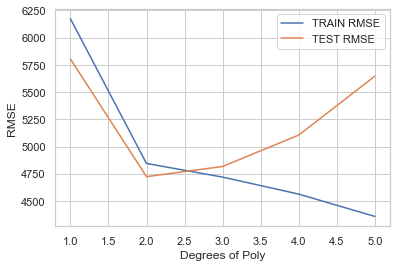

In [74]:
plt.plot(range(1,6), train_rmse_errors[:5],label='TRAIN RMSE')
plt.plot(range(1,6), test_rmse_errors[:5],label='TEST RMSE')

plt.ylabel('RMSE')
plt.xlabel('Degrees of Poly')
plt.legend()

In [75]:
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)


In [76]:
final_model = LinearRegression()

In [77]:
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X,y)

LinearRegression()

In [79]:
dump(final_model, 'final_poly_model.joblib')

['final_poly_model.joblib']

In [80]:
dump(final_poly_converter, 'final_converter.joblib')

['final_converter.joblib']

In [81]:
loaded_converter = load('final_converter.joblib')


In [82]:
loaded_model = load('final_poly_model.joblib')

In [83]:
values = [[65,1,22.5,3,0]]

In [85]:
transformed_data = loaded_converter.fit_transform(values)

In [86]:
loaded_model.predict(transformed_data)

array([18765.12692748])